<a href="https://colab.research.google.com/github/sunneysood/appliedai/blob/master/06_Implement_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Necessary Files

In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

# 2. Importing Dataset from Sklearn Datasets

In [2]:
#https://www.programcreek.com/python/example/82897/sklearn.datasets.load_boston
boston = load_boston()
#to understand datasets
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#https://www.programcreek.com/python/example/82897/sklearn.datasets.load_boston
X_total = boston["data"]
Y_total = boston["target"]
names = boston["feature_names"]
names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Dataset has 13 columns namely 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B' and  'LSTAT'

In [4]:
df_boston= pd.DataFrame(X_total,columns=names)
df_boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [5]:
df_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


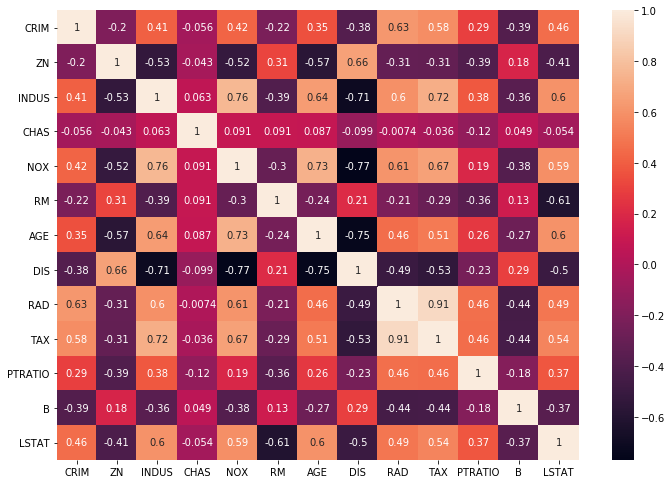

In [6]:
#X_train.corr()
# plot the heatmap
#https://stackoverflow.com/questions/39409866/correlation-heatmap
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

import seaborn as sns
sns.heatmap(df_boston.corr(), ax=ax,
        xticklabels=df_boston.corr().columns,
        yticklabels=df_boston.corr().columns, annot=True)

# 3. Splitting Data into Train and Test Datasets

In [7]:
#https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X_total, Y_total, test_size=0.15, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 13)
(76, 13)
(430,)
(76,)


### Above chart displays the correlation amoung the various features in the dataset

# 4. Performing column stardarisation of all features of the dataset

In [0]:
scaler= preprocessing.StandardScaler()
x_train_scaler = scaler.fit_transform(X_train)
x_test_scaler= scaler.transform(X_test)

In [0]:
#Y_train[23]

In [0]:
y_train_scaler =  scaler.fit_transform(Y_train.reshape(-1, 1))
y_test_scaler =  scaler.fit_transform(Y_test.reshape(-1, 1))


In [23]:
#https://stackoverflow.com/questions/49885007/how-to-use-scikit-learn-inverse-transform-with-new-values
y_train_inverse = scaler.inverse_transform(y_train_scaler)
y_train_inverse[23]

array([16.9087976])

## Defining Predict funtion 
 - Function takes a data row and cofficients as inputs and returns predicted values of y^ 
 - Function uses the equation y^= w0 + w1*x1 + w2*x2 ... wn*xn
 - Row 0 is considered for w0 intercept information

## Defining Root Mean Square error funtion 
 - Function takes as input actual and predicted values of output i.e. Y and Y^
 - Function returns the = square root of ( mean error in prediction given by predicted value (y^) - actual value(y) )

In [0]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [27]:
#https://stackoverflow.com/questions/49885007/how-to-use-scikit-learn-inverse-transform-with-new-values
rmse_metric(Y_train,y_train_inverse)

1.6506831645104922

## Defining Coefficient funtion 
 - Purpose of the function is to find the optiomal value of weights

In [15]:
#https://stackoverflow.com/questions/22596827/nameerror-name-random-is-not-defined
#https://stackoverflow.com/questions/17192158/nameerror-global-name-xrange-is-not-defined-in-python-3
#https://stackoverflow.com/questions/12167863/big-array-with-random-numbers-with-python
#https://www.geeksforgeeks.org/random-seed-in-python/

import random
random.seed(42) 
co_efficient = random.random()
weights = np.array([random.random() for _ in range(13)]).reshape(1,-1)
print(weights.shape)
print(co_efficient)

(1, 13)
0.6394267984578837


In [16]:
x_train_scaler.T.shape

(13, 430)

In [29]:
y_train_scaler.shape

(430, 1)

In [30]:
def predict_yhat(x,weight,bias):
  yhat = np.dot(weight,x.T) + bias
  return yhat.T

print(predict_yhat(x_train_scaler,weights,co_efficient).shape)

(430, 1)


In [32]:
def derivative_wrt_w(X,Y,w,b):
  dw =np.zeros(13)
  for i in range(X.shape[0]):
    dw += (-2*X[i]) * (Y[i] - (np.dot(w,X[i].T) + b))
  return dw 

print(derivative_wrt_w(x_train_scaler,y_train_scaler,weights,co_efficient))

[ 2.21380043e+26 -2.29089317e+26  3.09282028e+26  1.00874840e+25
  3.05240705e+26 -1.65407189e+26  2.78422918e+26 -2.89847029e+26
  2.85296607e+26  3.01372577e+26  1.83662018e+26 -1.83728289e+26
  2.73616060e+26]


In [33]:
def derivative_wrt_b(X,Y,w,b):
  db =0
  for i in range(X.shape[0]):
    db += (-2* (Y[i] - (np.dot(w,X[i].T) + b)))
  return db 

print(derivative_wrt_b(x_train_scaler,y_train_scaler,weights,co_efficient))

[7.19028696e+17]


In [31]:
epochs = 10
learning_rate = 1

for epoch in range(epochs):
  error = 0
  #y_hat = np.zeros(13)
  y_hat = predict_yhat(x_train_scaler,weights,co_efficient)
  error = rmse_metric(y_train_scaler,y_hat)
  print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, learning_rate, error))

  # Update weights and bias
  weights = weights - learning_rate * derivative_wrt_w(x_train_scaler,y_train_scaler,weights,co_efficient)
  co_efficient = co_efficient - learning_rate * derivative_wrt_b(x_train_scaler,y_train_scaler,weights,co_efficient)

  #update learning rate
  learning_rate = learning_rate / 2


>epoch=0, lrate=1.000, error=1.772
>epoch=1, lrate=0.500, error=6020.151
>epoch=2, lrate=0.250, error=15633575.321
>epoch=3, lrate=0.125, error=20497184151.798
>epoch=4, lrate=0.062, error=13430527636512.572
>epoch=5, lrate=0.031, error=4393418914744441.500
>epoch=6, lrate=0.016, error=716395157129298176.000
>epoch=7, lrate=0.008, error=58049848295506714624.000
>epoch=8, lrate=0.004, error=2322878808748920406016.000
>epoch=9, lrate=0.002, error=45313841054164495368192.000


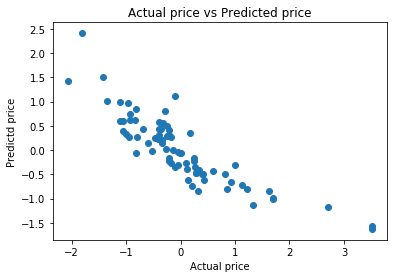

In [0]:
#Scatter plot of actual price vs predicted price
plt.scatter(y_test_scaler,predicted_housing)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [0]:
print(rmse_metric(y_test_scaler,predicted_housing))

1.649719322512088


## Using SGD classifier for Predicting Prices

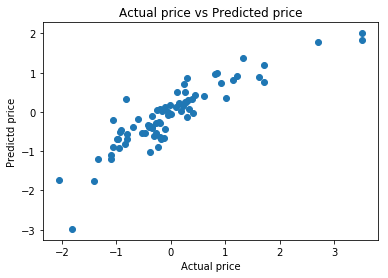

In [0]:
sgd=SGDRegressor(max_iter=500)
sgd.fit(x_train_scaler,y_train_scaler)
y_pred_sgd=sgd.predict(x_test_scaler)

#Scatter plot of actual price vs predicted price

plt.scatter(y_test_scaler,y_pred_sgd)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()

In [0]:
print("Coefficients of SGD : ", sgd.coef_)
print("Y_intercept of SGD : ", sgd.intercept_)

Coefficients of SGD :  [-1.02212603e-01  6.49029815e-02 -2.08336863e-02  7.76297083e-02
 -1.91245224e-01  3.11475417e-01 -3.66511299e-04 -3.12497442e-01
  1.69340155e-01 -8.19903946e-02 -2.15283167e-01  1.10726385e-01
 -4.13084653e-01]
Y_intercept of SGD :  [0.00193932]


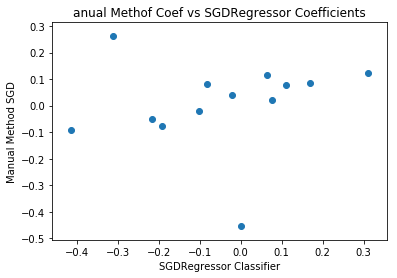

In [0]:
#Scatter plot of Manual Methof Coef vs SGDRegressor Coefficients

plt.scatter(sgd.coef_,coef)
plt.xlabel('SGDRegressor Classifier')
plt.ylabel('Manual Method SGD')
plt.title('anual Methof Coef vs SGDRegressor Coefficients')
plt.show()

In [0]:
#comparison between MSE of own implementation and SGD sklearn implementation
print('Mean Square error by manual method :'+ str(rmse_metric(y_test_scaler,predicted_housing)))
print('Mean Square error by SKLEARN SGDRegressor :'+ str(rmse_metric(y_test_scaler,y_pred_sgd)))

Mean Square error by manual method :1.649719322512088
Mean Square error by SKLEARN SGDRegressor :0.4645387205620291
